# tuning demo

This is an example code showing freq, ori, and phase tuning curves. Basically a reproduction of those figures in the [Natural Image Statistics](http://www.naturalimagestatistics.net/) book.

In [1]:
%matplotlib inline
from __future__ import division, print_function, absolute_import
import h5py
import numpy as np
import matplotlib.pyplot as plt
import early_vision_toolbox.tuning as tuning  # fuck imagen
# %load_ext holoviews.ipython
import matplotlib
# hackback due to holoviews. check <https://github.com/ioam/imagen/issues/48>
%matplotlib inline 

In [2]:
%%javascript
// make sure there's no scrollbar for plots.
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

(10, 1024)


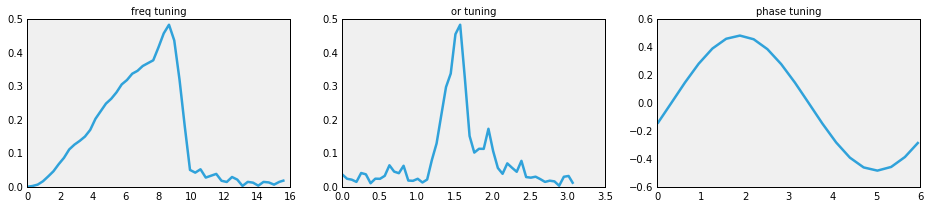

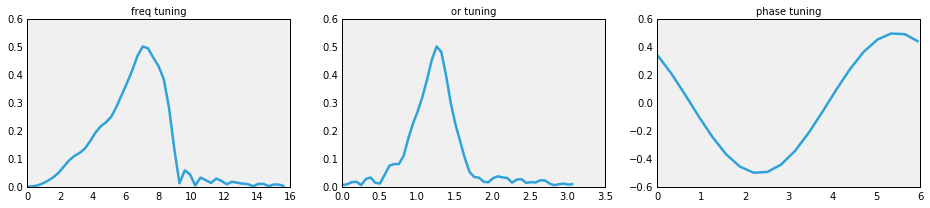

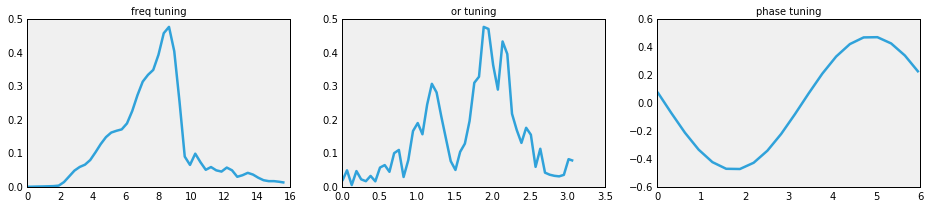

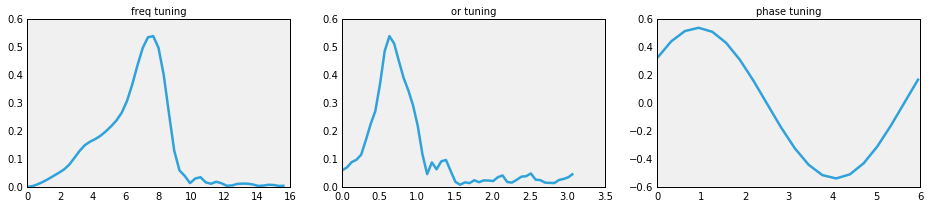

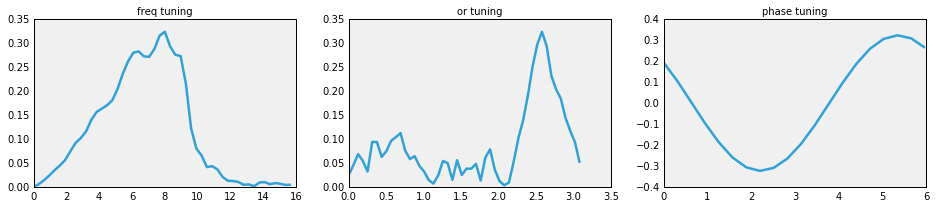

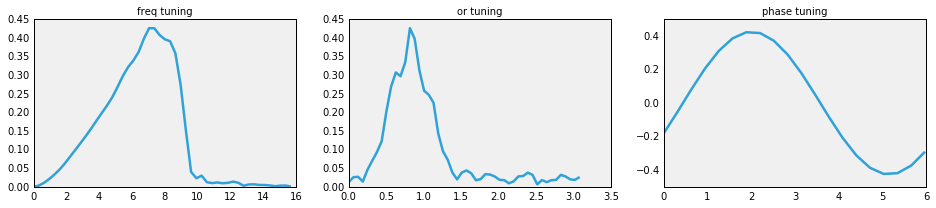

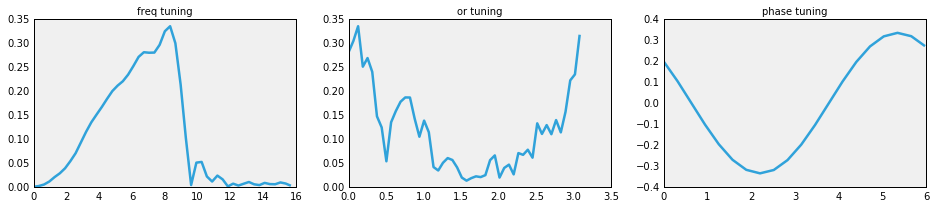

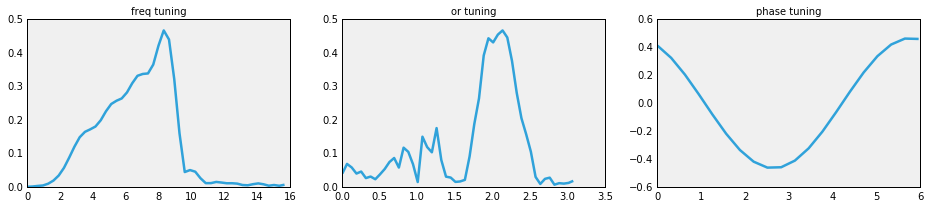

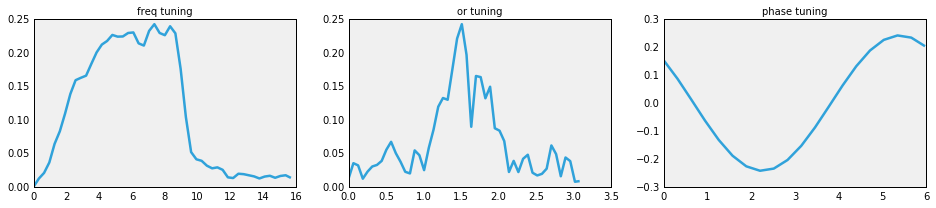

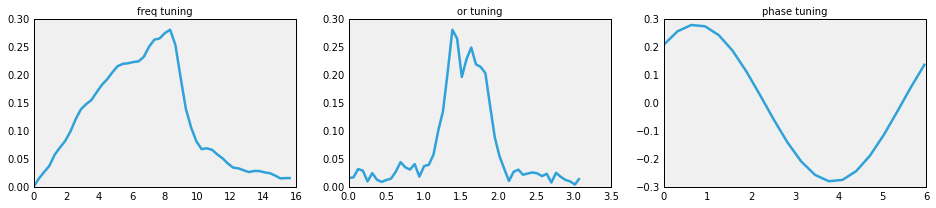

In [3]:
# load data.
f = h5py.File('tests/tuning_ref_results/NIS_results.hdf5', 'r+')
# get the filter
grp = f['ICA/tuning']
wica = grp['Wica'][:]
f.close()
# now shuffle this Wica. 1024x256
wica = wica.T
wica = wica.reshape(256, 32, 32)
wica = np.transpose(wica, (0, 2, 1))
wica = wica.reshape(256, 1024)
wica = wica[:10] # get the tuning of only first 10 neurons. 
print(wica.shape)
# get result
freq_tuning_result, freqvalues_test = tuning.freq_tuning_curve(wica)
or_tuning_result, orvalues_test = tuning.ori_tuning_curve(wica)
phase_tuning_result, phasevalues_test = tuning.phase_tuning_curve(wica)

for i_neuron in range(10):
    plt.close('all')
    plt.figure(figsize=(16,3))
    plt.subplot(1,3,1)
    plt.plot(freqvalues_test, freq_tuning_result[i_neuron])
    plt.title('freq tuning')

    plt.subplot(1,3,2)
    plt.plot(orvalues_test, or_tuning_result[i_neuron])
    plt.title('or tuning')

    plt.subplot(1,3,3)
    plt.plot(phasevalues_test, phase_tuning_result[i_neuron])
    plt.title('phase tuning')
    
    plt.show()


The results should the same as those under `tests/tuning_ref_results` for freq and orientation (`a` -> freq, `b` -> orientation, `c` -> phase). The result for phase is different, due to implementation differences for sine gratings. If in the code, I pass `legacy=True` when computing phase tuning, then it gives the same result again. But this illustrates the fact that phase tuning is probably not useful in terms of the absolute phase it's tuned to due to the arbitrariness of phase (compared to orientation and orientation).